Creating dog classification data

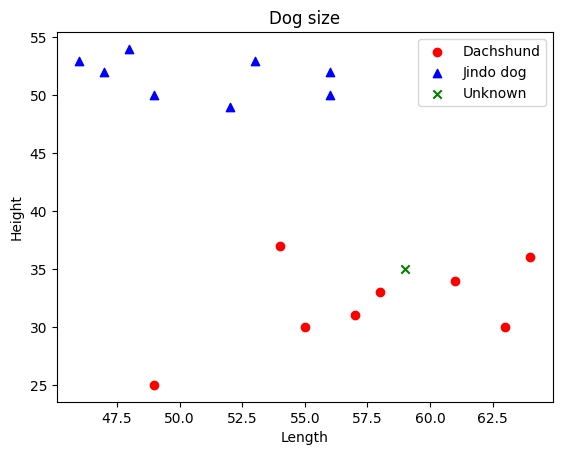

In [1]:
import matplotlib.pyplot as plt
dach_length = [55,57,64,63,58,49,54,61]
dach_height = [30,31,36,30,33,25,37,34]
jin_length  = [56,47,56,46,49,53,52,48]
jin_height  = [52,52,50,53,50,53,49,54]

newdata = [[59,35]]

plt.scatter(dach_length,dach_height,c='r',label='Dachshund')
plt.scatter(jin_length, jin_height, c='b',marker='^',label='Jindo dog')
plt.scatter(newdata[0][0], newdata[0][1], c='g',marker='x',label='Unknown')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend(loc='upper right')

In [2]:
import numpy as np

d_data = np.column_stack((dach_length,dach_height))
d_label = np.zeros(len(d_data))

j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(j_data))

dogs   = np.concatenate([d_data, j_data])
labels = np.concatenate([d_label,j_label])

#print(d_data)
#print(dogs)

KNN classfication

In [3]:
from sklearn.neighbors import KNeighborsClassifier

dog_classes = {0:'Dachshund',1:'Jindo Dog'}
k = 3
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(dogs,labels)
y_pred = knn.predict(newdata)

print('data',newdata,', prediction result: ',dog_classes[y_pred[0]])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


data [[59, 35]] , prediction result:  Dachshund


SVM

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm = Pipeline([('scaler',StandardScaler()),
                ('linearSVC',LinearSVC(C=1,loss='hinge'))])
svm.fit(dogs,labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))])

In [5]:
print(svm.named_steps['linearSVC'].coef_)
print(svm.named_steps['linearSVC'].intercept_)
print(svm.named_steps['scaler'].transform(dogs))

w=svm.named_steps['linearSVC'].coef_
b=svm.named_steps['linearSVC'].intercept_
dt=svm.named_steps['scaler'].transform(dogs)

[[-0.16876933  1.27579701]]
[0.03119845]
[[ 0.13882344 -1.15746348]
 [ 0.50901929 -1.05947716]
 [ 1.80470477 -0.56954552]
 [ 1.61960685 -1.15746348]
 [ 0.69411722 -0.8635045 ]
 [-0.97176411 -1.64739511]
 [-0.04627448 -0.4715592 ]
 [ 1.249411   -0.76551818]
 [ 0.32392137  0.9982357 ]
 [-1.34195996  0.9982357 ]
 [ 0.32392137  0.80226305]
 [-1.52705788  1.09622203]
 [-0.97176411  0.80226305]
 [-0.23137241  1.09622203]
 [-0.41647033  0.70427672]
 [-1.15686203  1.19420835]]


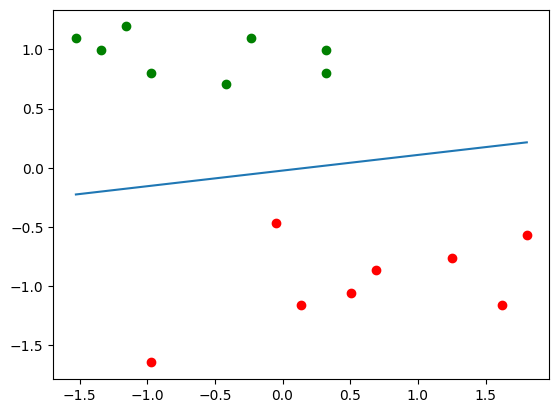

In [6]:
x=np.linspace(np.min(dt[:,0]),np.max(dt[:,0]))
y = -(w[0,0]/w[0,1])*x - b/w[0,1]
plt.plot(x,y)

plt.scatter(dt[:8,0],dt[:8,1],c='r')
plt.scatter(dt[8:,0],dt[8:,1],c='g')

In [7]:
newdata1 = [[59,35]]
newdata2 = [[53,54]]

print(svm.predict(newdata1))
print(svm.predict(newdata2))

[0.]
[1.]
